In [1]:
import pandas as pd
import seaborn as sns

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


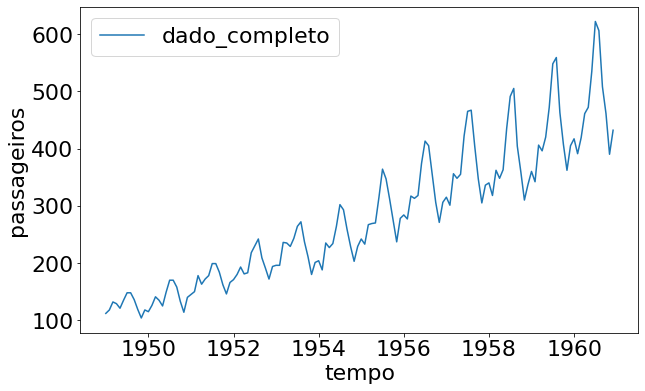

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passageiros)
dados_escalado = sc.transform(passageiros)
x = dados_escalado[:,0]
y = dados_escalado[:,1]

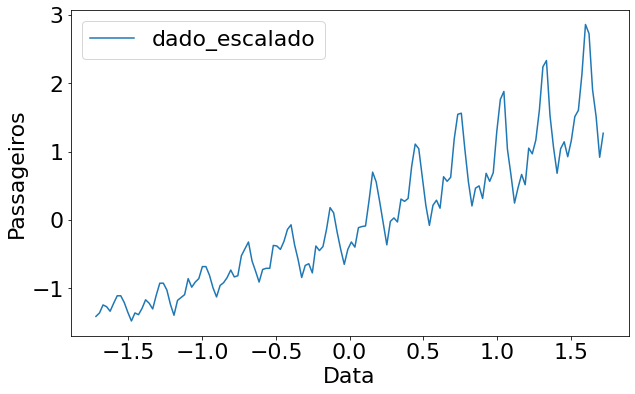

In [6]:
# plotando o dado scalado
import matplotlib.pyplot as plt

plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [7]:
tamanho_treino = int(len(passageiros)* 0.9)
tamanho_teste = len(passageiros) - tamanho_treino
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

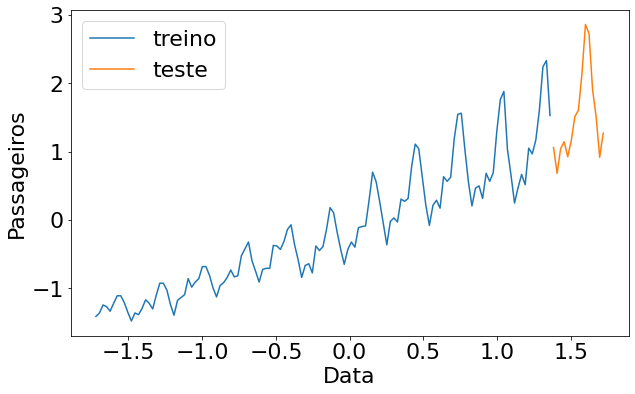

In [8]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [9]:
# import tensorflow as tf
# print(tf.__version__)

In [10]:
 pip install keras==2.6.*

Note: you may need to restart the kernel to use updated packages.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=True))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()
regressor.fit(xtreino,ytreino)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step - loss: 0.1286


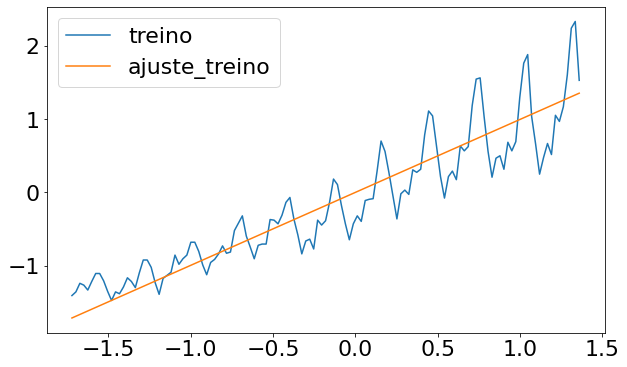

In [12]:
y_predict = regressor.predict(xtreino)

sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [13]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.713394
1,-1.696007,-1.689439
2,-1.671950,-1.665483
3,-1.647894,-1.641528
4,-1.623837,-1.617573


In [14]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']
resultado_transf.head()

,tempo,passageiros
0,1949.000000,75.463995
1,1949.083333,78.327819
2,1949.166667,81.191672
3,1949.250000,84.055497
4,1949.333333,86.919335


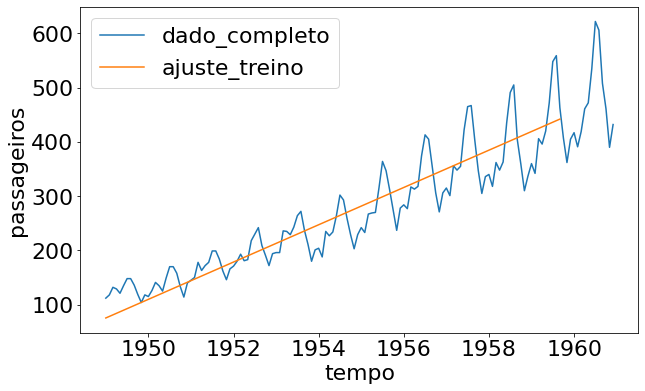

In [15]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [16]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

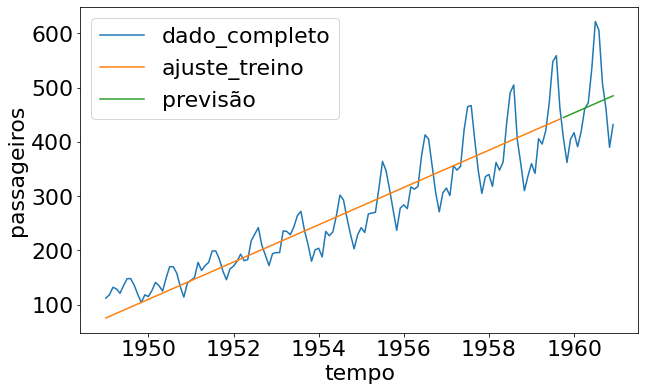

In [17]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [18]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
activation='linear', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
activation='linear', use_bias=False))

In [19]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [21]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8096
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8091
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8085
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8077
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8065
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8047
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8020
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7983
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7933
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7872
Epoch 11/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7792
Epoch 12/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7691
Epoch 13/200
5/5 [==============================] - 0s 1ms/st

In [22]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

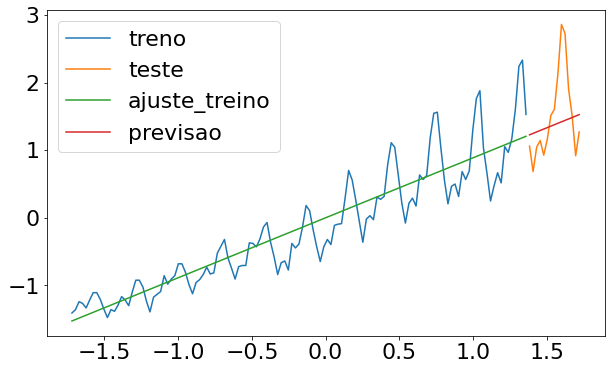

In [23]:
sns.lineplot(x=xtreino, y=ytreino, label='treno')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')

In [24]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()
regressor2.fit(xtreino, ytreino, epochs=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
Total params: 160
Trainable params: 160
Non-trainable params: 0
________________________________________________________

In [25]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

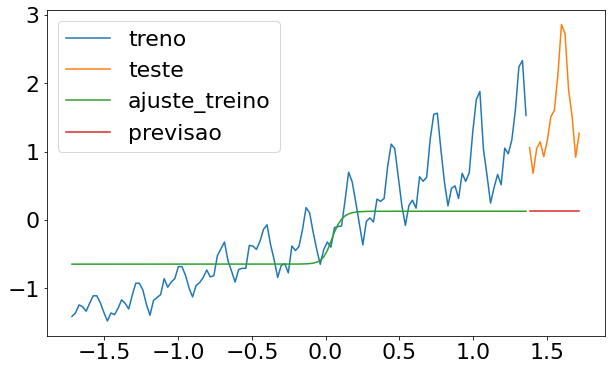

In [26]:
sns.lineplot(x=xtreino, y=ytreino, label='treno')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')

In [27]:
vetor = pd.DataFrame(ytreino)[0]

In [28]:
import numpy as np

def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [29]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [30]:
xtreino_novo[0:5]

In [31]:
ytreino_novo[0:5]

In [32]:
vetor2 = pd.DataFrame(yteste)[0]

In [33]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [36]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [37]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.7753
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7454
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7257
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7056
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6824
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6595
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6347
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6077
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5775
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5455
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5112
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4750
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

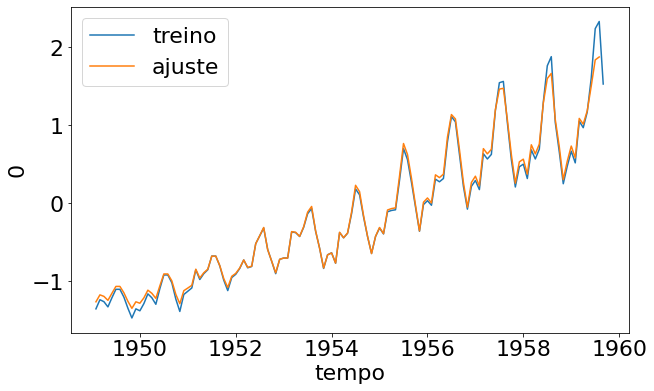

In [40]:
y_predict_novo = regressor3.predict(xtreino_novo)
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste')

In [41]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

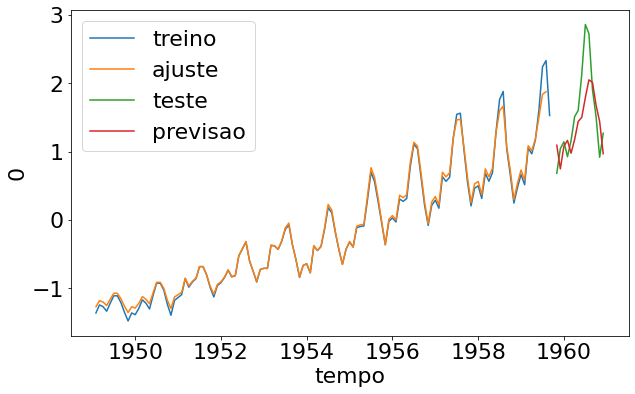

In [43]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

In [44]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [45]:
xtreino_novo[0:5]

In [46]:
ytreino_novo[0:5]

In [47]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [48]:
regressor4 = Sequential()

In [49]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [51]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7390
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6616
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5954
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5331
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4707
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4062
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [52]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [58]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

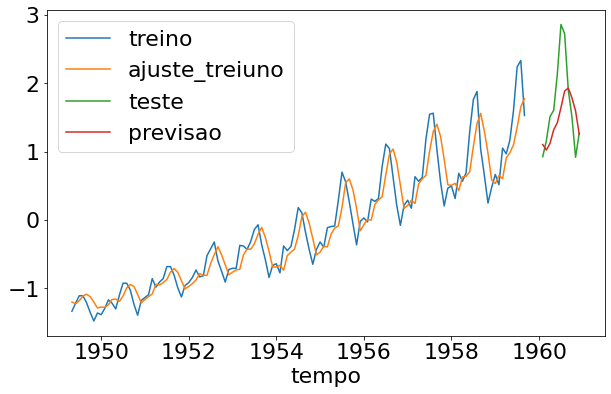

In [59]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treiuno')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao')